# Using Pandas for Data Analysis

## 1) and 2)

In [1]:
import pandas as pd
import numpy as np


# 2
df = pd.read_csv('NationalNames.csv')
df.head(8)

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414


## 3)

In [2]:
#3
df.tail(8)

,Id,Name,Year,Gender,Count
1825425,1825426,Zo,2014,M,5
1825426,1825427,Zyeir,2014,M,5
1825427,1825428,Zyel,2014,M,5
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
1825432,1825433,Zyrin,2014,M,5


## 4)

In [3]:
#4
df.columns

Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')

## 5)

In [4]:
#5
df.describe()

,Id,Year,Count
count,1.825433e+06,1.825433e+06,1.825433e+06
mean,9.127170e+05,1.972620e+03,1.846879e+02
std,5.269573e+05,3.352891e+01,1.566711e+03
min,1.000000e+00,1.880000e+03,5.000000e+00
25%,4.563590e+05,1.949000e+03,7.000000e+00
50%,9.127170e+05,1.982000e+03,1.200000e+01
75%,1.369075e+06,2.001000e+03,3.200000e+01
max,1.825433e+06,2.014000e+03,9.968000e+04


## 6)

In [5]:
#6
len(df['Name'].unique()) 

93889

## 7)

In [6]:
#7
df['Gender'].value_counts()

F    1081683
M     743750
Name: Gender, dtype: int64

## 8)

In [7]:
#8
filt = (df['Year'] == 2010) & (df['Gender'] == 'M')
df[filt].head(5)

,Id,Name,Year,Gender,Count
1677392,1677393,Jacob,2010,M,22082
1677393,1677394,Ethan,2010,M,17985
1677394,1677395,Michael,2010,M,17308
1677395,1677396,Jayden,2010,M,17152
1677396,1677397,William,2010,M,17030


## 9)

In [8]:
#9
maxvalue = df.max()['Name']
maxyer = df.max()['Year']
f"My name is {maxvalue} in {maxyer}"

'My name is Zzyzx in 2014'

## 10)

In [9]:
#10
value = df['Count'].min()

fir = (df['Count'] == value)
df[fir].count()['Count']


254615

## 11)

In [10]:
#11
df.groupby('Year')['Name'].nunique()


Year
1880     1889
1881     1830
1882     2012
1883     1962
1884     2158
        ...  
2010    31603
2011    31418
2012    31236
2013    30774
2014    30579
Name: Name, Length: 135, dtype: int64

## 12)

In [11]:
#12
vl = df.groupby("Year")["Name"].nunique().to_frame().sort_values(by='Name')
vl.tail(1)

,Name
Year,
2008,32488


## 13)

In [12]:
#13
edt = (df['Year'] == 2008)& (df['Gender'] == 'M')
def most_popular(series):
    return series.iloc[0]

baby_pop = df[edt].groupby('Year').agg(most_popular)
baby_pop

,Id,Name,Gender,Count
Year,,,,
2008,1608303,Jacob,M,22568


## 14)

In [13]:
#14
edt = (df['Name'] == 'Jacob')&(df['Gender'] == 'F')
def most_popular(series):
    return series.iloc[0]

baby_pop = df[edt].groupby('Year').agg(most_popular).sort_values(by='Count')
baby_pop.tail(1)

,Id,Name,Gender,Count
Year,,,,
2004,1455557,Jacob,F,171


## 15)

In [19]:
#15

df.groupby(['Year','Name', 'Gender']).sum().unstack().dropna().groupby(['Year']).count().unstack().max()

2557

## 16)

In [15]:
#16
df.pivot_table(index=['Year'], values="Count", aggfunc=np.sum).head(5)

,Count
Year,
1880,201484
1881,192699
1882,221538
1883,216950
1884,243467


## 17)

In [16]:
#17
both_df = df.groupby("Year").sum()
both_df.max()["Count"]
both_df.idxmax()["Count"]

1957

## 18)

In [17]:
#18

df.pivot_table(values ='Count', index='Year', columns='Gender', aggfunc='sum').head(5)


Gender,F,M
Year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445


## 19)

In [20]:
#19
filt1 = df.groupby(['Year','Gender'])['Count'].sum().unstack()
filt1[filt1.F > filt1.M].count()

Gender
F    54
M    54
dtype: int64

## 20)

Text(0, 0.5, 'total births per year')

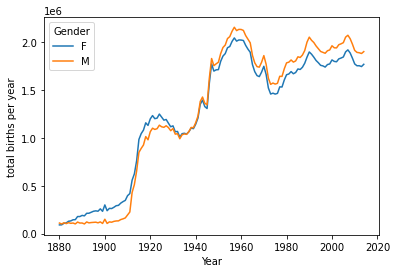

In [21]:
#20
from matplotlib import pyplot as plt
df.pivot_table(values ='Count', index='Year', columns='Gender', aggfunc='sum').plot()
plt.ylabel('total births per year')

## 21)

In [22]:
#21
both_df = df.pivot_table(index="Name", columns="Gender", values="Count", aggfunc=np.sum).dropna()
len(both_df.index)

10221

## 22)

In [23]:
#22
selection = df[(df['Name'] == "Barbara") & (df['Gender'] == "M")]
selection['Count'].sum()

4139

## 23)

In [24]:
#23
condition1 = df['Year'] > 2000
condition2 = df['Gender'] == "M"
df.loc[condition1 & condition2]

,Id,Name,Year,Gender,Count
1380267,1380268,Jacob,2001,M,32527
1380268,1380269,Michael,2001,M,29675
1380269,1380270,Matthew,2001,M,26799
1380270,1380271,Joshua,2001,M,26006
1380271,1380272,Christopher,2001,M,23117
...,...,...,...,...,...
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
